### Demonstrating Relationship Between Rasterio and Numpy

In [9]:
import math
import numpy as np
import rasterio as rio

In [2]:
img = rio.open('data/20190321_174348_0f1a_3B_AnalyticMS.tif')
blue, green, red, nir = img.read()

In [7]:
print(type(blue))
print(blue.ndim)
print(blue.dtype)

<class 'numpy.ndarray'>
2
uint16


In [8]:
for band in img.read():
    print(f'min: {band.min()}, max: {band.max()}')

min: 0, max: 30256
min: 0, max: 20671
min: 0, max: 27564
min: 0, max: 33932


In [10]:
x_coord = img.bounds.left + 10000
y_coord = img.bounds.top - 10000

col, row = img.index(x_coord, y_coord, op=math.floor)
col = int(col)
row = int(row)

print(f'Red: {red[row, col]}')
print(f'Green: {green[row, col]}')
print(f'Blue: {blue[row, col]}')
print(f'NIR: {nir[row, col]}')

Red: 2771
Green: 3974
Blue: 4603
NIR: 1008


### Visualizing Satellite Imagery with Matplotlib

In [11]:
import matplotlib.pyplot as plt

In [12]:
image_file = 'output/clipped.tif'
img = rio.open(image_file)

In [26]:
def scale(band):
    return band / 10000.0

blue, green, red, nir =[scale(img.read(n)) for n in range(1, img.count + 1)] 

In [27]:
rgb = np.dstack((red, green, blue))
nrg = np.dstack((nir, red, green))

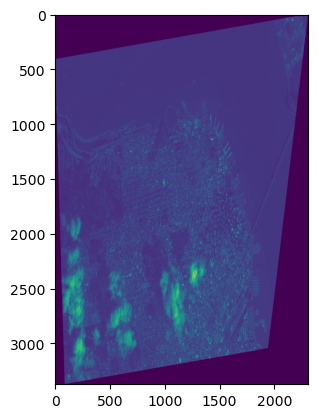

In [28]:
fig = plt.imshow(blue)
plt.show()

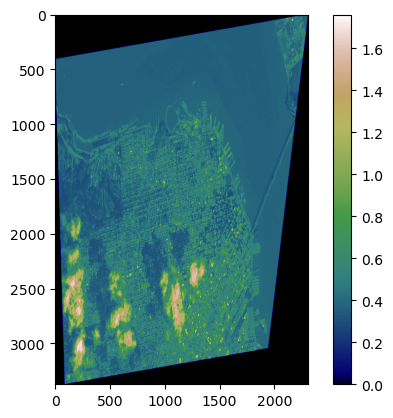

In [29]:
fig = plt.imshow(green)
fig.set_cmap('gist_earth')
plt.colorbar()
plt.show()

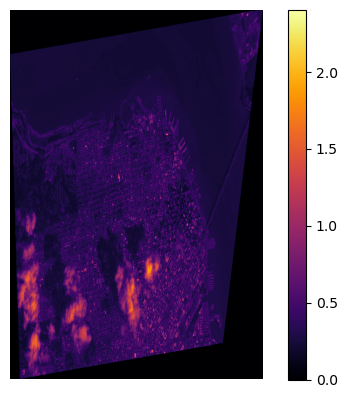

In [30]:
fig = plt.imshow(red)
fig.set_cmap('inferno')
plt.colorbar()
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


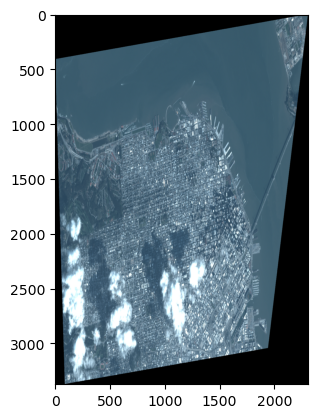

In [32]:
plt.imshow(rgb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


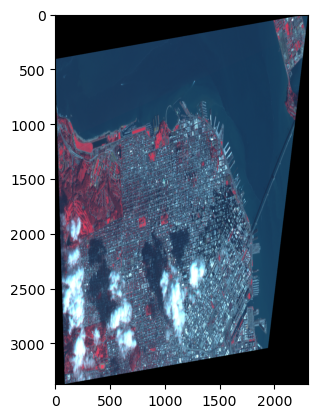

In [33]:
plt.imshow(nrg)